# TOF data
Data taken at intervals of $T=0.1ms$, where $T$ represents the period of free flight after trapping. Captured in sequences of 10 ranging from 0.1ms to 1.0ms. 

In [1]:
import sys
sys.path.append("../")
import datarun
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

In [2]:
d = datarun.Experiment(
    vstart = .1,
    vend = 1.0,
    vstep = .1, 
    idx_start = 11,
    datapath = "/home/ben/Documents/Repos/MOTsArentForKids/data/mar02/",
    numtrials = 10
)

|████████████████████████████████████████| 100/100 [100%] in 4:29.3 (0.37/s)                                            


In [3]:
sigma_times = d.structure_data(lambda d : d.popt_x[2]**2)

removed_count = 0
for key in sigma_times:
    sigma = np.std(sigma_times[key]) 
    mean = np.mean(sigma_times[key])
    for val in sigma_times[key]:
        if np.abs(val-mean) > 2*sigma:
            sigma_times[key].remove(val)
            print(key, val)

means = [np.mean(arr) for arr in sigma_times.values()]
errs = [np.std(arr) for arr in sigma_times.values()]
time_list = np.array(list(sigma_times.keys()))

0.2 1.0232004788589376e-08
0.30000000000000004 1.6981487860564373e-08
0.5 1.560077088533721e-08
0.7000000000000001 2.6856089641377706e-08
0.8 1.7921029252639807e-08
1.0 1.992541151854723e-08


In [46]:
popt, pcov = curve_fit(lambda x,a,b:a*x**2+b, d.vlist, means, sigma=errs)

In [53]:
np.mean(errs)

1.388222848810209e-09

In [58]:
np.mean(errs)/(2*np.sqrt(popt[0])*np.sqrt(10))*1e3

0.0021561630453148213

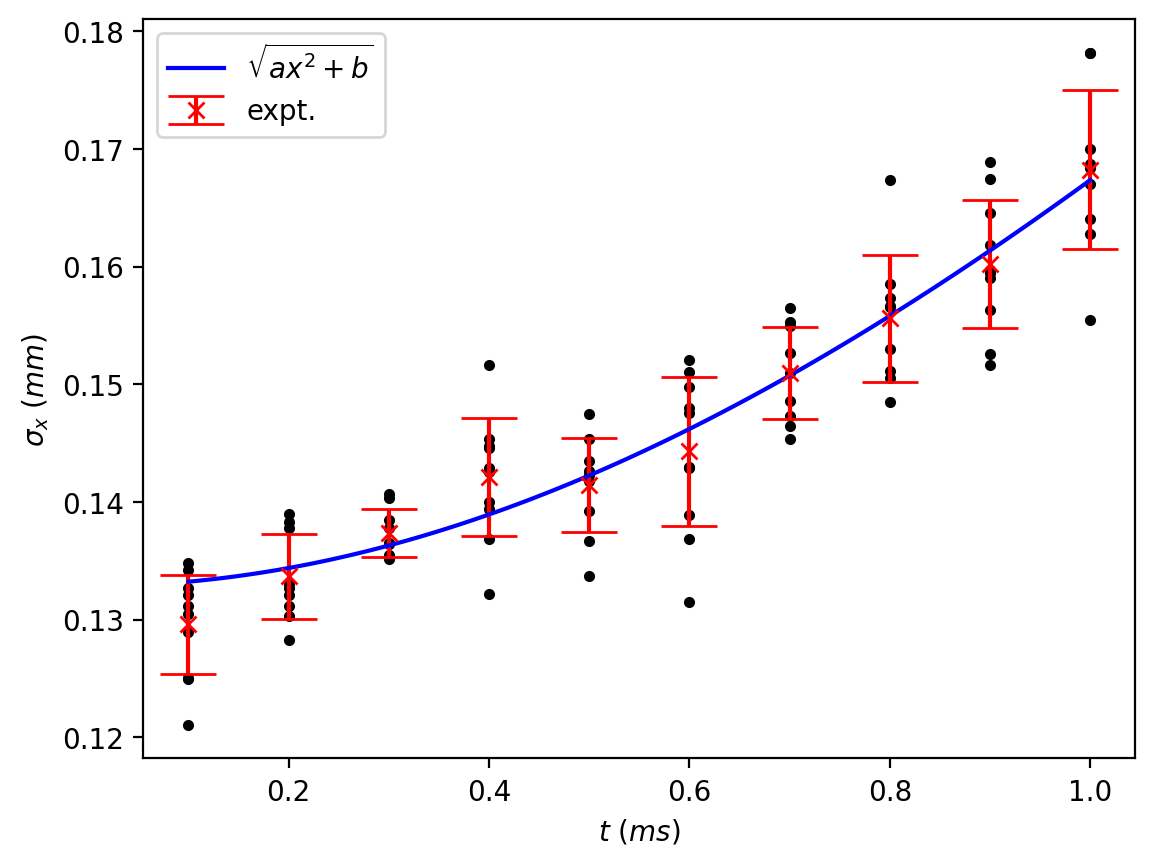

In [116]:
scale = 1e3
plt.errorbar(list(sigma_times.keys()), scale*np.sqrt(np.array(means)), yerr = scale*np.array(errs)/(2*np.sqrt(np.array(means))), linestyle = "None", c = 'r', capsize=10, marker = "x", label = "expt.")
for time, arr in sigma_times.items():
    for val in arr:
        plt.scatter(time, scale*np.sqrt(val), c="k", marker = ".")

xaxis = np.linspace(min(d.vlist), max(d.vlist), 100)
plt.plot(xaxis, scale*np.sqrt((popt[0]*xaxis**2+popt[1])), c="b", label = r"$\sqrt{ax^2+b}$")

plt.xlabel(r"$t \ (ms)$")
plt.ylabel(r"$\sigma_x \ (mm)$")
plt.gcf().set_dpi(200)
plt.legend()

In [117]:
v_rms = np.sqrt(popt[0])*1e3*np.sqrt(3)
v_err = np.mean(errs)*3*1e6/(np.sqrt(9))*3

First, we have $\langle (x+vt)^2 \rangle = \langle x^2 \rangle + \langle v^2\rangle t^2$, using $\langle v \rangle = 0$, and thus the fit parameter $a$ gives the RMS velocity. Plugging this into the Maxwell-Bolzmann distribution,
$$
v_{rms} = \sqrt{\frac{3RT}{M}} \Rightarrow T = \frac{v_{rms}^2 M}{3R}
$$

In [118]:
v_rms**2*39.1/(3*8.315)*1e3

48.73149019600911

In [119]:
v_err*39.1/(3*8.315)*1e3

6.527902993202547

In [120]:
v_rms

In [ ]:
v_err/v_rms

0.022407503663326236

In [112]:
v_err/(2*np.sqrt(v_rms))

0.011203751831663116

In [115]:
v_err

0.003950951491915046